### Investigate number_of_learners > 40 outliers

#### Problem:
number_of_learners is normally distributed with a large number
of outliers over 40

In [54]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


In [55]:
dfFlt = load_df('dfFlt')
dfRaw = load_df('dfRaw')

#### Display histogram

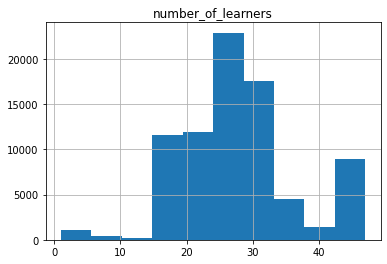

In [56]:
out = dfFlt.select('number_of_learners').toPandas().hist()

- Just under 10,000 over 40 learners
- Normally distributed

#### Compare Full vs Filtered Dataset
- Is the difference from filtering by Fully Scored?
- Filtered dataset is only "Fully Scored" observations

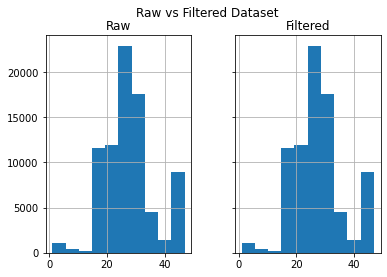

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

dfRaw.select('number_of_learners').toPandas().hist(ax=ax1)
ax1.set_title('Raw')

dfFlt.select('number_of_learners').toPandas().hist(ax=ax2)
ax2.set_title('Filtered')

plt.suptitle('Raw vs Filtered Dataset')

plt.show()

- No Difference
- Not from filtering

#### Filtered Calculated
- Add recalculation the number_of_learners

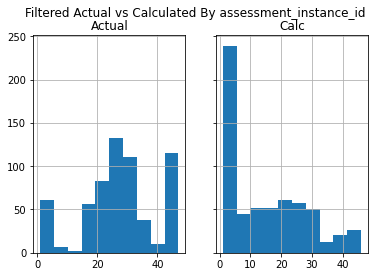

In [58]:
# Calculate number of learners on Filtered
dfPd = dfFlt.groupBy('assessment_instance_id', 'number_of_learners').agg(
F.countDistinct('learner_id').alias('number_of_learners_calc')
).toPandas()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

dfPd['number_of_learners'].hist(ax=ax1)
ax1.set_title('Actual')

dfPd['number_of_learners_calc'].hist(ax=ax2)
ax2.set_title('Calc')

plt.suptitle('Filtered Actual vs Calculated By assessment_instance_id')

plt.show()

- Significantly Different
- Calculated
  - Normal distribution with outliers
    - Outliers at 1 to 5 and 40
  - Or, Skewed Right Normal distribution

#### Imputed
- Impute the full dateset with recalculated number_of_learners

In [59]:
dfImpute = dfRaw.join(dfCount, on=['assessment_instance_id'], how='left')


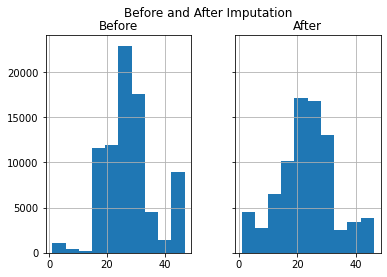

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

dfRaw.select('number_of_learners').toPandas().hist(ax=ax1)
ax1.set_title('Before')

dfImpute.select('number_of_learners_calc').toPandas().hist(ax=ax2)
ax2.set_title('After')

plt.suptitle('Before and After Imputation')

plt.show()

add_todo("Impute number_of_learners with calculated values")
finish_todo('Investigate number_of_learners > 40 outliers')